In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller 
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np

In [46]:
diario = pd.read_csv('diario.csv')
semanal = pd.read_csv('semanal.csv')
mensual = pd.read_csv('mensual.csv')

In [47]:
diario['pickup_datetime'] = pd.to_datetime(diario['pickup_datetime'])
semanal['pickup_datetime'] = pd.to_datetime(semanal['pickup_datetime'])
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])

In [ ]:
diario.set_index('pickup_datetime', inplace=True)
mensual.set_index('pickup_datetime', inplace=True)
semanal.set_index('pickup_datetime', inplace=True)

## Regresiones

In [57]:
diario.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-05,107088,152369.55,1746995.00,1.040973e+06,84509.0
2023-09-06,125811,179210.26,2181041.47,1.381579e+06,100073.0
2023-09-07,139797,199385.39,2453146.14,1.579063e+06,110657.0
2023-09-08,136767,187498.75,2299946.76,1.473957e+06,104886.0
2023-09-09,140098,190146.87,2148279.09,1.380598e+06,100666.0


In [58]:
semanal.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479.0
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,586816.0
2023-10-01,840174,1177465.37,13800304.01,8.531493e+06,647820.0
2023-10-08,871700,1223806.22,14176927.80,8.775225e+06,664636.0
2023-10-15,865999,1207735.18,14104448.20,8.814019e+06,659893.0


In [59]:
mensual.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-30,2732993,3840800.70,45795129.41,2.875794e+07,2403633.0
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961.0
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540.0
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2936035.0
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477.0


## Preparacion

In [ ]:
mensual['fecha_numeros']=mensual.index.map(datetime.datetime.toordinal)
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)

### Regresion Lineal

In [63]:
reg_lineal_d = LinearRegression() #Instanciamos el modelo

reg_lineal_d.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura) 

LinearRegression()

In [64]:
reg_lineal_s = LinearRegression() #Instanciamos el modelo

reg_lineal_s.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura) 

LinearRegression()

In [65]:
reg_lineal_m = LinearRegression() #Instanciamos el modelo

reg_lineal_m.fit(mensual.fecha_numeros.values.reshape(-1, 1), mensual.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura) 

LinearRegression()

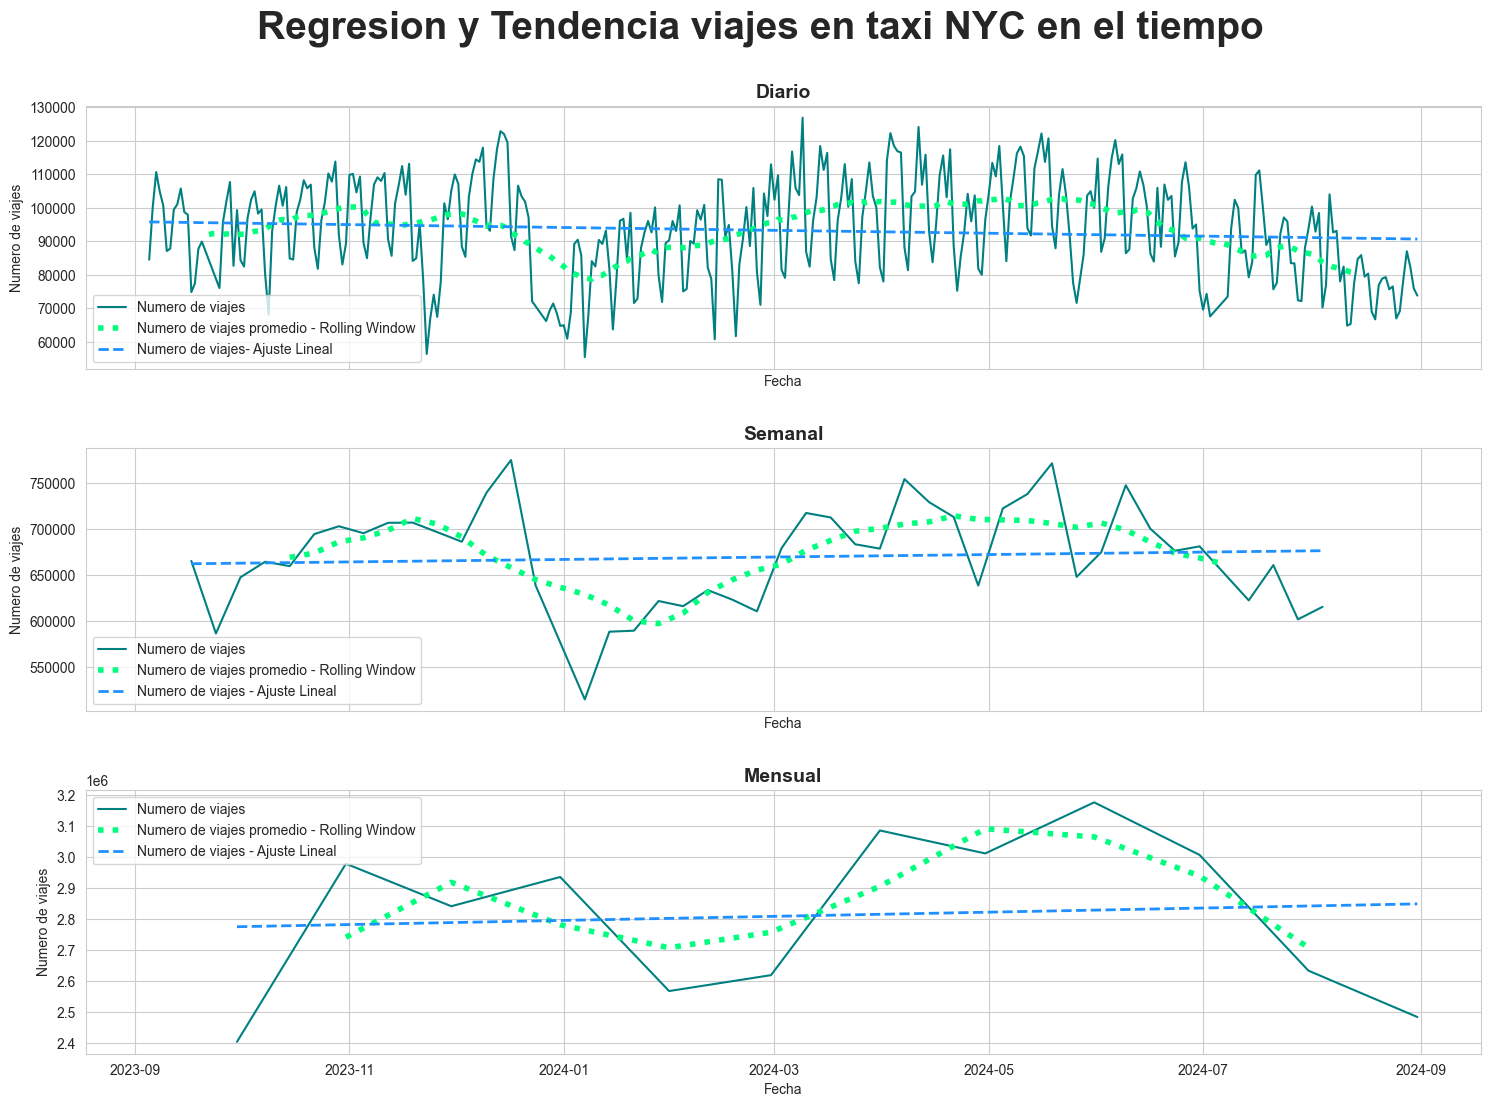

In [66]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (18,12), gridspec_kw={'height_ratios': [1, 1,1]}, sharex=True)
fig.suptitle("Regresion y Tendencia viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ventana = (35)
diario_promedio_tendencia = diario.n_trips.rolling(window=ventana, center = True).mean()
ax[0].plot(diario.index, diario.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(diario_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[0].plot(diario.index, reg_lineal_d.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes- Ajuste Lineal', color='dodgerblue')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Numero de viajes')
ax[0].set_title('Diario',fontsize=14, fontweight='bold')
ax[0].legend()

ventana = (9)
semanal_promedio_tendencia = semanal.n_trips.rolling(window=ventana, center = True).mean()
ax[1].plot(semanal.index, semanal.n_trips, label = 'Numero de viajes', color='teal')
ax[1].plot(semanal_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[1].plot(semanal.index, reg_lineal_s.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes - Ajuste Lineal', color='dodgerblue')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Numero de viajes')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')
ax[1].legend()

ventana = (3)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
ax[2].plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
ax[2].plot(mensual_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[2].plot(mensual.index, reg_lineal_m.predict(mensual.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes - Ajuste Lineal', color='dodgerblue')
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Numero de viajes')
ax[2].set_title('Mensual',fontsize=14, fontweight='bold')
ax[2].legend()

plt.show()

### Regresiones Polinomicas